In [ ]:
# Choropleth map of Percentage of High School Graduates in Baltimore City using U.S. Census Bureau
# tract data obtained from the 2017 American Communities Survey (ACS).

In [2]:
pwd

'/Users/aaronwoodward'

In [1]:
cd '/Users/aaronwoodward/Downloads/cb_2017_36_bg_500k'

/Users/aaronwoodward/Downloads/cb_2017_36_bg_500k


In [2]:
# Importing packages 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd

pd.options.display.max_rows = 10

In [3]:
#Importing Tiger Census Reporter API to GeoPandas (Courtesy of Datamade)
from census_area import Census 
import cenpy as cen
from us import states
from shapely.geometry import Polygon

In [13]:
#import json

#NY_shape_json = json.read("../Downloads/2010_NY_Censustracts")

AttributeError: module 'json' has no attribute 'read'

In [22]:
#Census_blocks_NY = gpd.read_file("../Downloads/tlgdb_2018_a_36_ny.gdb")

In [4]:
#Setting shapefile path:
shp_path = './cb_2017_36_bg_500k.shp'

In [5]:
#Census_tracts_NY = gpd.read_file("../Downloads/tl_2018_36_tract")
bg_NY = gpd.read_file(shp_path)
bg_NY.head()

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,36,055,011601,4,1500000US360550116014,360550116014,4,BG,1199928,0,"POLYGON ((-77.459357 43.131177, -77.45725 43.1..."
1,36,081,027300,5,1500000US360810273005,360810273005,5,BG,36773,0,"POLYGON ((-73.874455 40.752859, -73.8735279999..."
2,36,047,033600,1,1500000US360470336001,360470336001,1,BG,92258,0,"POLYGON ((-74.008134 40.57774999999999, -74.00..."
3,36,047,035500,1,1500000US360470355001,360470355001,1,BG,46494,0,"POLYGON ((-73.934224 40.665378, -73.931455 40...."
4,36,121,970700,3,1500000US361219707003,361219707003,3,BG,9369087,108465,"POLYGON ((-78.07423299999999 42.640762, -78.07..."


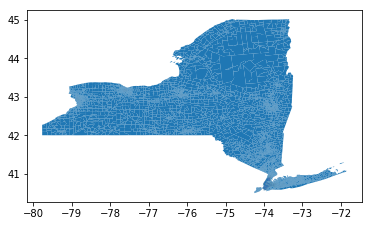

In [6]:
bg_NY.plot()

In [9]:
bg_Bklyn = bg_NY[(bg_NY['COUNTYFP'] == "047")]
bg_Bklyn.head()

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
2,36,047,033600,1,1500000US360470336001,360470336001,1,BG,92258,0,"POLYGON ((-74.008134 40.57774999999999, -74.00..."
3,36,047,035500,1,1500000US360470355001,360470355001,1,BG,46494,0,"POLYGON ((-73.934224 40.665378, -73.931455 40...."
9,36,047,007800,1,1500000US360470078001,360470078001,1,BG,34353,0,"POLYGON ((-74.013172 40.648652, -74.0114119999..."
26,36,047,014900,3,1500000US360470149003,360470149003,3,BG,40877,0,"POLYGON ((-73.985094 40.662681, -73.982732 40...."
31,36,047,120200,2,1500000US360471202002,360471202002,2,BG,57865,0,"POLYGON ((-73.86886799999999 40.677156, -73.86..."


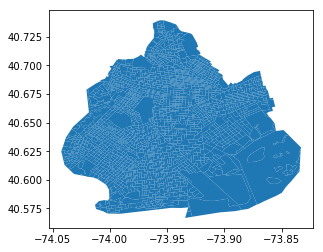

In [10]:
bg_Bklyn.plot()

In [29]:
#Census_tracts_Bklyn = Census_tracts_Bklyn.rename(columns={'TRACTCE':'tract'})

In [96]:
# Pulling data via the Census API
c = Census("d06e3ffd2eb61bc6576e3fc0e6ff6f8ba6981fad")
df1 = c.acs5.get(('NAME','B19013_001E'),
         {'for': 'block group:*', 'in': 'state:%s county:047' % states.NY.fips})
#B19013_001E

In [33]:
#df1['TRACTCE'] = df1['tract']+'.0'+df1['block group']

In [97]:
df1 = pd.DataFrame(data = df1)
df1.head()

,B19013_001E,NAME,block group,county,state,tract
0,61000.0,"Block Group 2, Census Tract 698, Kings County,...",2,047,36,069800
1,-666666666.0,"Block Group 0, Census Tract 702.02, Kings Coun...",0,047,36,070202
2,-666666666.0,"Block Group 1, Census Tract 702.02, Kings Coun...",1,047,36,070202
3,-666666666.0,"Block Group 0, Census Tract 702.03, Kings Coun...",0,047,36,070203
4,-666666666.0,"Block Group 0, Census Tract 706, Kings County,...",0,047,36,070600


In [98]:
df1['GEOID'] = df1['state']+df1['county']+df1['tract']+df1['block group']

In [38]:
#df1 = drop.df1['TRACTCE']
#df1.head()

NameError: name 'drop' is not defined

In [99]:
df1.head()

,B19013_001E,NAME,block group,county,state,tract,GEOID
0,61000.0,"Block Group 2, Census Tract 698, Kings County,...",2,047,36,069800,360470698002
1,-666666666.0,"Block Group 0, Census Tract 702.02, Kings Coun...",0,047,36,070202,360470702020
2,-666666666.0,"Block Group 1, Census Tract 702.02, Kings Coun...",1,047,36,070202,360470702021
3,-666666666.0,"Block Group 0, Census Tract 702.03, Kings Coun...",0,047,36,070203,360470702030
4,-666666666.0,"Block Group 0, Census Tract 706, Kings County,...",0,047,36,070600,360470706000


In [29]:
#df1 = c.acs5.get(('NAME','B19001_001E'),('block group'),
#            {'in': 'state:36 county:047'% states.NY.fips})

TypeError: not all arguments converted during string formatting

In [100]:
df1 = pd.merge(df1,bg_Bklyn, on=['GEOID'])
df1.head()

,B19013_001E,NAME_x,block group,county,state,tract,GEOID,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,AFFGEOID,NAME_y,LSAD,ALAND,AWATER,geometry
0,61000.0,"Block Group 2, Census Tract 698, Kings County,...",2,047,36,069800,360470698002,36,047,069800,2,1500000US360470698002,2,BG,423542,120721,"POLYGON ((-73.92249799999999 40.609809, -73.91..."
1,-666666666.0,"Block Group 0, Census Tract 702.02, Kings Coun...",0,047,36,070202,360470702020,36,047,070202,0,1500000US360470702020,0,BG,0,1620409,"POLYGON ((-73.89861999999999 40.604609, -73.89..."
2,-666666666.0,"Block Group 1, Census Tract 702.02, Kings Coun...",1,047,36,070202,360470702021,36,047,070202,1,1500000US360470702021,1,BG,5162435,114853,"POLYGON ((-73.919296 40.606947, -73.9178199999..."
3,-666666666.0,"Block Group 0, Census Tract 702.03, Kings Coun...",0,047,36,070203,360470702030,36,047,070203,0,1500000US360470702030,0,BG,0,19419444,"POLYGON ((-73.89230599999999 40.620556, -73.88..."
4,-666666666.0,"Block Group 0, Census Tract 706, Kings County,...",0,047,36,070600,360470706000,36,047,070600,0,1500000US360470706000,0,BG,0,783671,"POLYGON ((-73.89826099999999 40.622989, -73.89..."


In [94]:
#for x in df1.B19013_001E:
#    df1['B19013_001E'][df1['B19013_001E'] < 0] = 0

AttributeError: 'Int64Index' object has no attribute 'B19013_001E'

In [70]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2062 entries, 0 to 2061
Data columns (total 17 columns):
B19013_001E    2062 non-null float64
NAME_x         2062 non-null object
block group    2062 non-null object
county         2062 non-null object
state          2062 non-null object
tract          2062 non-null object
GEOID          2062 non-null object
STATEFP        2062 non-null object
COUNTYFP       2062 non-null object
TRACTCE        2062 non-null object
BLKGRPCE       2062 non-null object
AFFGEOID       2062 non-null object
NAME_y         2062 non-null object
LSAD           2062 non-null object
ALAND          2062 non-null int64
AWATER         2062 non-null int64
geometry       2062 non-null object
dtypes: float64(1), int64(2), object(14)
memory usage: 290.0+ KB


In [73]:
#df1 = df1['B19013_001E'].clip(lower=0)

Text(0.5, 1.0, 'Brooklyn, NY - Median Household Income by Census Block Group, 2017')

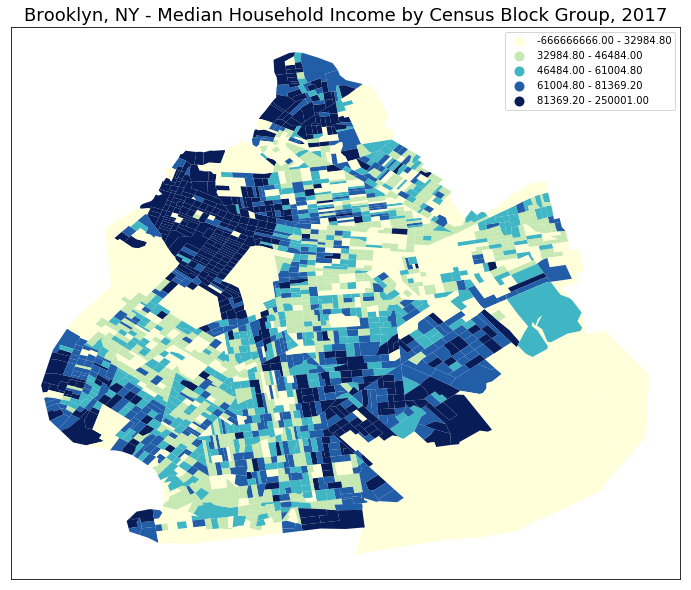

In [101]:
# Creating choropleth map
bklyn_gdf = gpd.GeoDataFrame(geometry = df1['geometry'], data = df1['B19013_001E'])
fig, ax = plt.subplots(figsize=(12,12))
ax.set(aspect='equal', xticks=[], yticks=[])
bklyn_gdf.plot(column= 'B19013_001E', ax = ax, scheme='QUANTILES', cmap='YlGnBu', legend=True)
plt.title('Brooklyn, NY - Median Household Income by Census Block Group, 2017', size = 18)